In [1]:
from additional_test_set import AdditionalTestSet

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from imblearn.ensemble import BalancedRandomForestClassifier

from simple_ml_models import *
from utils import *
from additional_test_set_visualisation import Visualisation


2023-01-08 14:49:35.751658: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data_path = "data/CTC_new_28_12_2022/countsTrainNew.tsv"
test_data_path = "data/CTC_new_28_12_2022/countsTestNew.tsv"
train_classes_path = "data/CTC_new_28_12_2022/sampleInfoTrain.tsv"
test_classes_path = "data/CTC_new_28_12_2022/sampleInfoTest.tsv"
SEED = 42

data_object = AdditionalTestSet(
    train_data_path, test_data_path, train_classes_path, test_classes_path
)
data_object.summary()

Total cells number in train data: 29154
CTC cells number in train data: 1534
WBC cells number in train data: 27620

Total cells number in test data: 357
CTC cells number in test data: 262
WBC cells number in test data: 81
CTC-WBC cells number in test data: 14


In [3]:
cut_by_mean_train_data, cut_by_mean_test_data = AdditionalTestSet.cut_data_by_mean(
    data_object.train_data, data_object.test_data, threshold=0.6
)
(
    cut_by_mean_max_train_data,
    cut_by_mean_max_test_data,
) = AdditionalTestSet.cut_data_by_max(
    cut_by_mean_train_data, cut_by_mean_test_data, threshold=7
)
print(f"Feature number: {len(cut_by_mean_max_train_data.columns)}")

Feature number: 46


In [4]:
cut_by_mean_with_classes_train_data, cut_by_mean_with_classes_test_data = data_object.cut_data_by_mean_with_classes(
    data_object.train_data, data_object.test_data, threshold=0.5
)
print(f"Feature number: {len(cut_by_mean_with_classes_train_data.columns)}")

Feature number: 59


### LightGBM

In [5]:
lgbm_clf = LGBMClassifier(
    boosting_type="gbdt",
    min_child_weight=0.01,
    max_depth=10,
    num_leaves=16,
    n_estimators=2000,
    subsample_for_bin=10000,
    is_unbalance=True,
    n_jobs=12,
    random_state=SEED,
)

### Cut by mean + max data

In [6]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_max_train_data,
    data_object.train_classes,
    cut_by_mean_max_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()


Validation balanced accuracy 0.9978458393428141
Training balanced accuracy 1.0

Validation roc auc 0.9999826418867966
Training roc auc 1.0

Validation precision 0.953255647484542
Training precision 1.0

Validation recall 0.9986966426125244
Training recall 1.0

Validation f1 0.9742640269172261
Training f1 1.0



In [7]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.8345857935229916

Test roc auc 0.8976710204568498

Test precision 0.9735890158343111

Test recall 0.7391304347826088

Test f1 score 0.8393596648443431


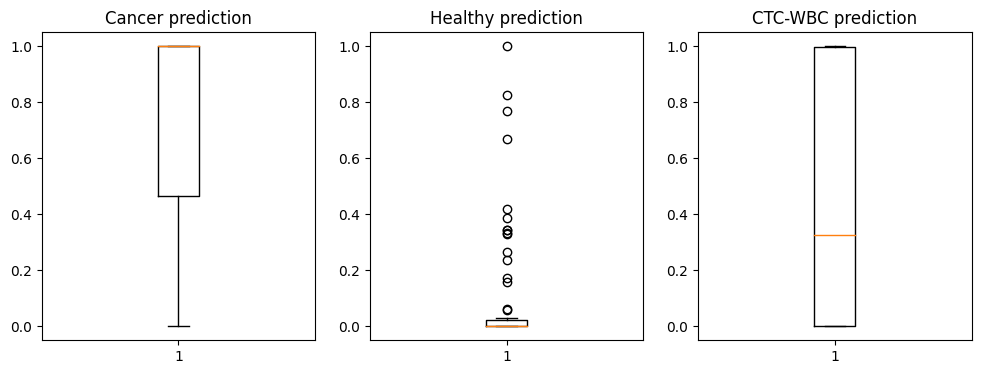

In [8]:
vis = Visualisation(lgbm_estimators, cut_by_mean_max_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

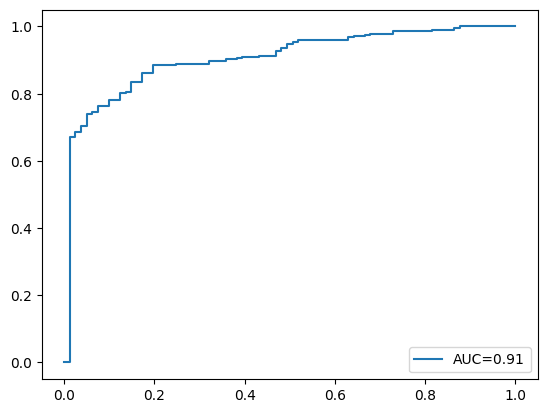

In [9]:
vis.draw_roc_curve_from_probabilities()

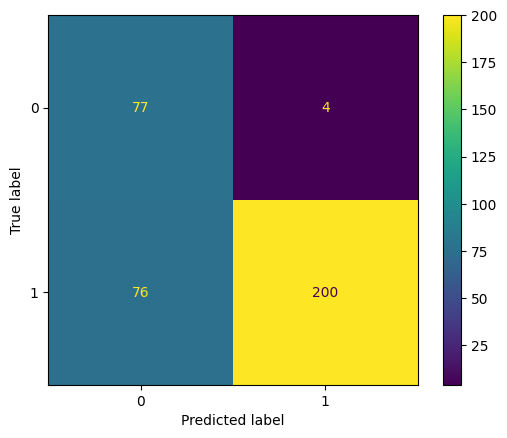

In [10]:
vis.display_confusion_matrix()

### Cut by mean with classes

In [11]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_with_classes_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9961601052623915
Training balanced accuracy 1.0

Validation roc auc 0.9999858315733525
Training roc auc 1.0

Validation precision 0.9909061719006709
Training precision 1.0

Validation recall 0.9928270751793868
Training recall 1.0

Validation f1 0.9918481378528502
Training f1 1.0



In [12]:
lgbm_model_object.display_test_results()

Test balanced accuracy 0.8286366076221148

Test roc auc 0.8868909166815769

Test precision 0.9643140957176279

Test recall 0.7560386473429951

Test f1 score 0.8461409761720331


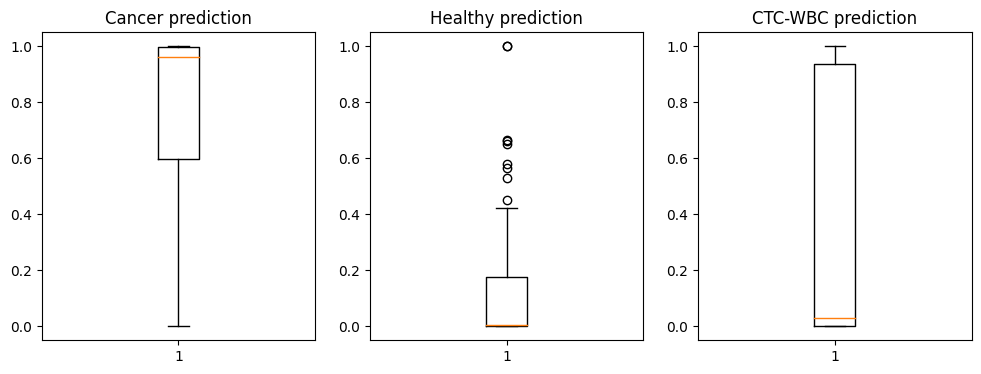

In [13]:
vis = Visualisation(lgbm_estimators, cut_by_mean_with_classes_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

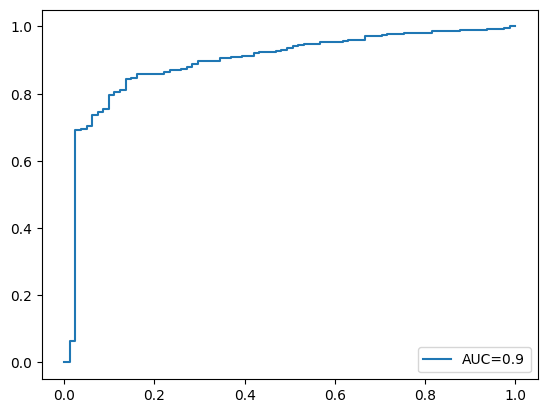

In [14]:
vis.draw_roc_curve_from_probabilities()

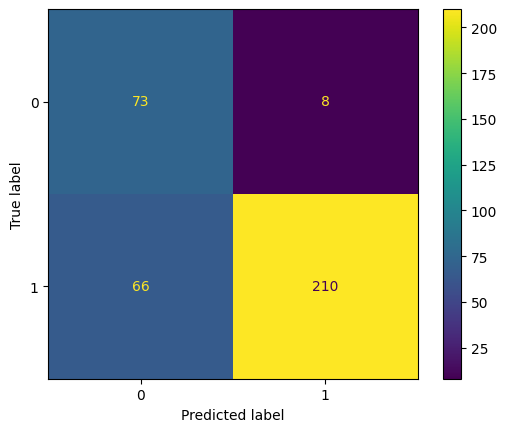

In [15]:
vis.display_confusion_matrix()

### XGBoost

In [16]:
healthy_cells_train_indices = np.where(data_object.train_classes == 0)[0]
cancer_cells_train_indices = np.where(data_object.train_classes == 1)[0]

class_weight = len(healthy_cells_train_indices) / len(cancer_cells_train_indices)

xgb_clf = XGBClassifier(
    booster="gbtree",
    eta=0.2,
    min_child_weight=48,
    max_depth=8,
    gamma=0.01,   
    scale_pos_weight=class_weight,
    n_jobs=12,
    random_state=SEED,
)

### Cut by mean + max data

In [17]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_max_train_data,
    data_object.train_classes,
    cut_by_mean_max_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.9976463933529037
Training balanced accuracy 0.9989136804840409

Validation roc auc 0.9999213583574008
Training roc auc 0.999969800498722

Validation precision 0.9377225319020653
Training precision 0.967855100168769

Validation recall 0.9993476842791912
Training recall 0.9996738421395955

Validation f1 0.966081190972573
Training f1 0.983496468060999



In [18]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.7234746824118804

Test roc auc 0.8479602791196994

Test precision 0.9617998549667731

Test recall 0.5169082125603864

Test f1 score 0.672070446379481


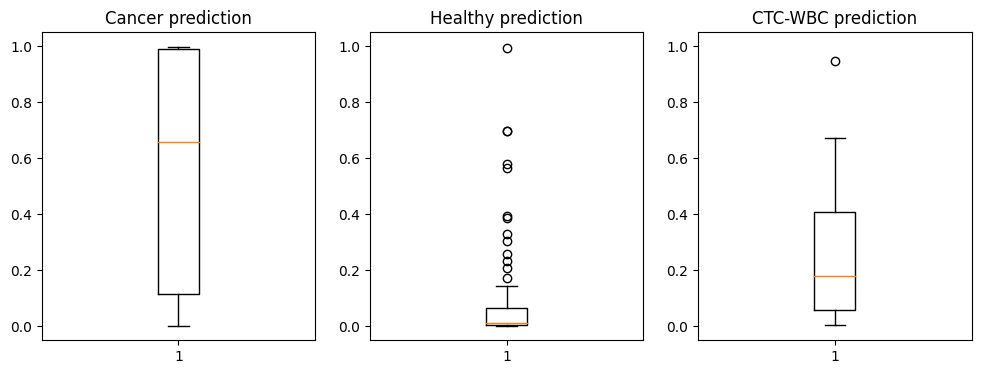

In [19]:
vis = Visualisation(xgboost_estimators, cut_by_mean_max_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

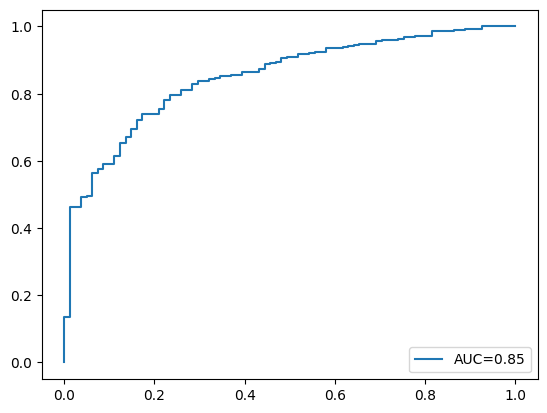

In [20]:
vis.draw_roc_curve_from_probabilities()

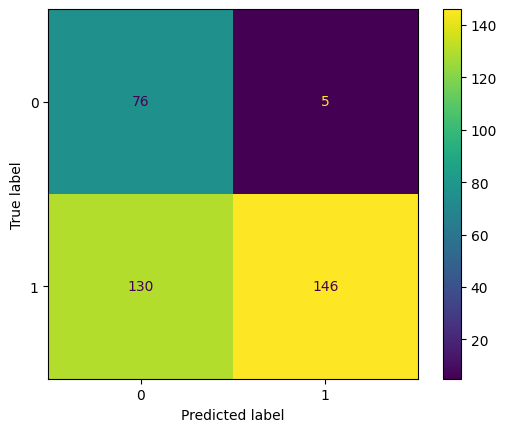

In [21]:
vis.display_confusion_matrix()

### Cut by mean with classes

In [22]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_with_classes_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.9957440433697547
Training balanced accuracy 0.9987871119354602

Validation roc auc 0.9998916563975171
Training roc auc 0.9999810440892564

Validation precision 0.944292935259368
Training precision 0.9581529506205136

Validation recall 0.9947827482876712
Training recall 1.0

Validation f1 0.9687107354745859
Training f1 0.9786286911119788



In [23]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.8495705850778315

Test roc auc 0.9144152203733524

Test precision 0.9775905756179962

Test recall 0.7608695652173912

Test f1 score 0.8534241486236018


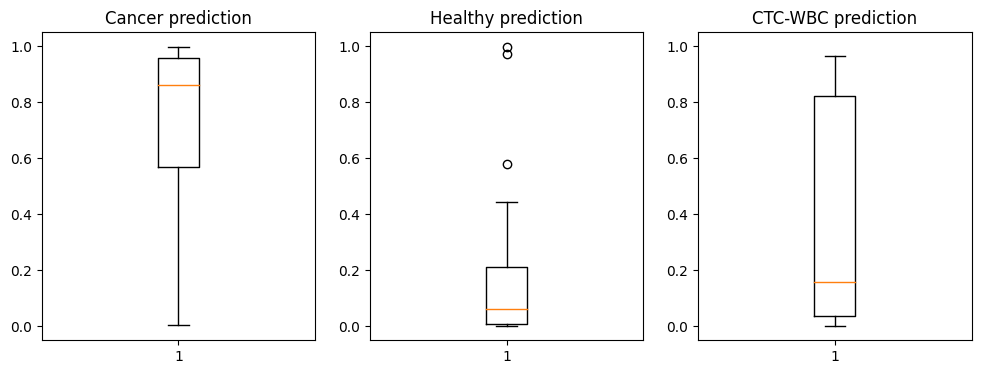

In [24]:
vis = Visualisation(xgboost_estimators, cut_by_mean_with_classes_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

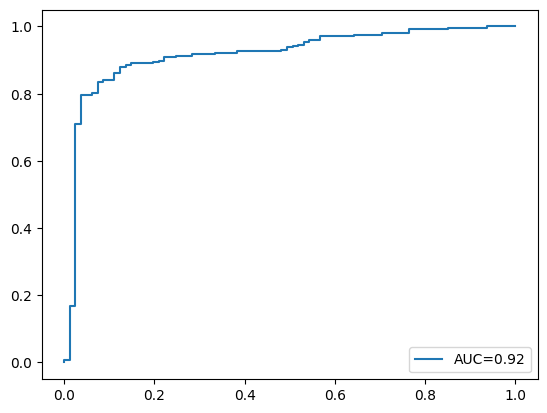

In [25]:
vis.draw_roc_curve_from_probabilities()

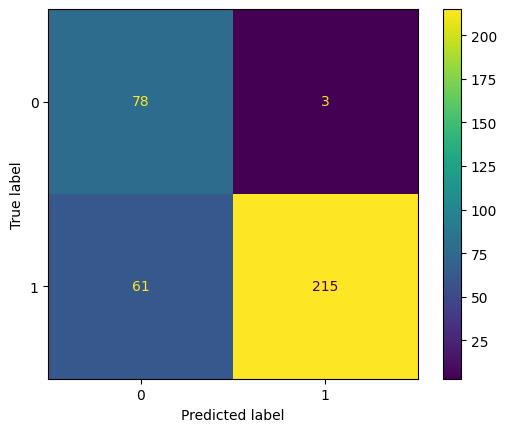

In [26]:
vis.display_confusion_matrix()

### Random Forest

In [27]:
rf_clf = RandomForestClassifier(  
    criterion="log_loss",
    n_estimators=2000,
    n_jobs=12,
    random_state=SEED,
)

### Cut by mean + max data

In [28]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_max_train_data,
    data_object.train_classes,
    cut_by_mean_max_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.9983701665499369
Training balanced accuracy 1.0

Validation roc auc 0.9999868573296177
Training roc auc 1.0

Validation precision 0.9885745537341974
Training precision 1.0

Validation recall 0.9973920111709068
Training recall 1.0

Validation f1 0.992914484266497
Training f1 1.0



In [29]:
rf_model_object.display_test_results()

Test balanced accuracy 0.618200930398998

Test roc auc 0.8395956342816246

Test precision 0.9669355830106338

Test recall 0.26932367149758457

Test f1 score 0.4190041578284484


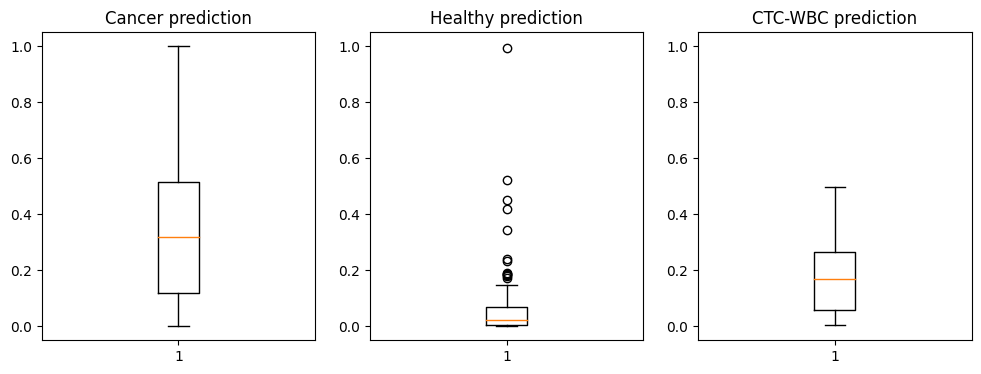

In [30]:
vis = Visualisation(rf_estimators, cut_by_mean_max_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

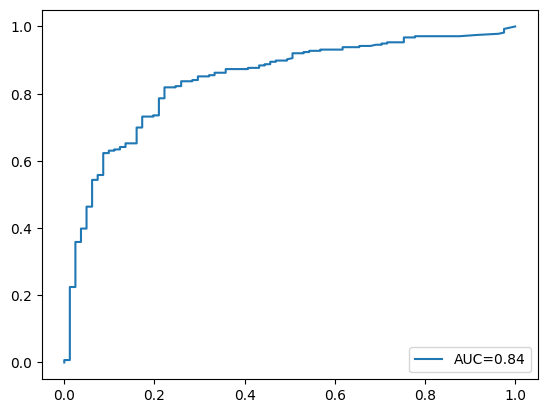

In [31]:
vis.draw_roc_curve_from_probabilities()

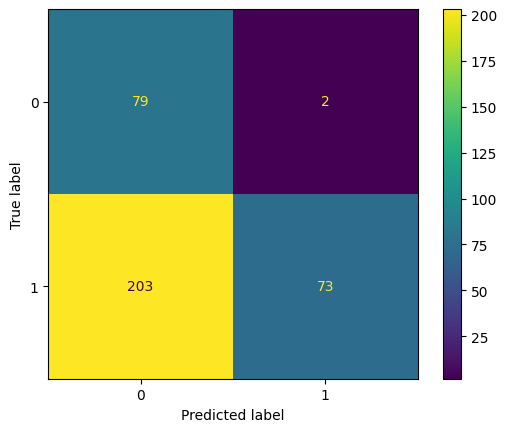

In [32]:
vis.display_confusion_matrix()

### Cut by mean with classes

In [33]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_with_classes_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.9927184621675479
Training balanced accuracy 1.0

Validation roc auc 0.9999896572106127
Training roc auc 1.0

Validation precision 0.9960903533719069
Training precision 1.0

Validation recall 0.9856541503587737
Training recall 1.0

Validation f1 0.9907792780069954
Training f1 1.0



In [34]:
rf_model_object.display_test_results()

Test balanced accuracy 0.8085077831454642

Test roc auc 0.8923704300113319

Test precision 0.9759196415063465

Test recall 0.678743961352657

Test f1 score 0.7968973669193772


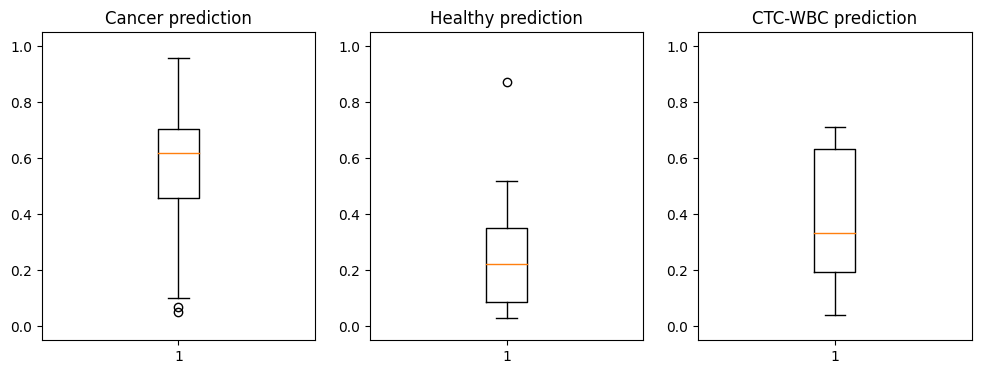

In [35]:
vis = Visualisation(rf_estimators, cut_by_mean_with_classes_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

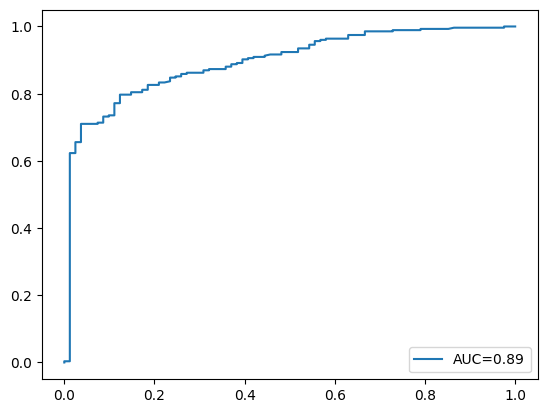

In [36]:
vis.draw_roc_curve_from_probabilities()

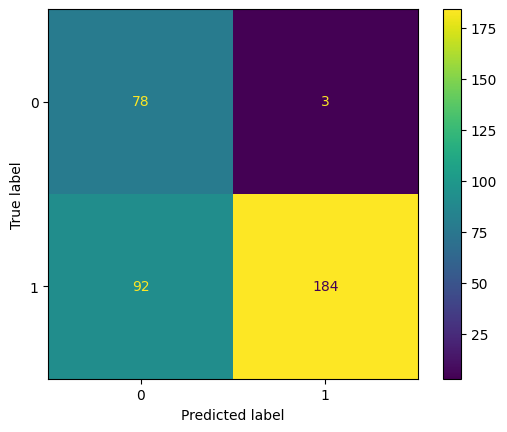

In [37]:
vis.display_confusion_matrix()

### Balanced Random Forest

In [38]:
brf_clf = BalancedRandomForestClassifier(
    n_estimators=2000,
    class_weight="balanced",
    criterion="entropy",
    oob_score=True,  
    n_jobs=12,
    random_state=SEED,
)

### Cut by mean + max data

In [39]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_max_train_data,
    data_object.train_classes,
    cut_by_mean_max_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.997592407638217
Training balanced accuracy 0.9989681449277258

Validation roc auc 0.9999573132820916
Training roc auc 0.9999983890297885

Validation precision 0.9280918366194125
Training precision 0.9642524767770588

Validation recall 1.0
Training recall 1.0

Validation f1 0.9607169292909554
Training f1 0.9817799421479251



In [40]:
brf_model_object.display_test_results()

Test balanced accuracy 0.6846484165324744

Test roc auc 0.8110797996063698

Test precision 0.93288768180373

Test recall 0.4927536231884058

Test f1 score 0.644285862275143


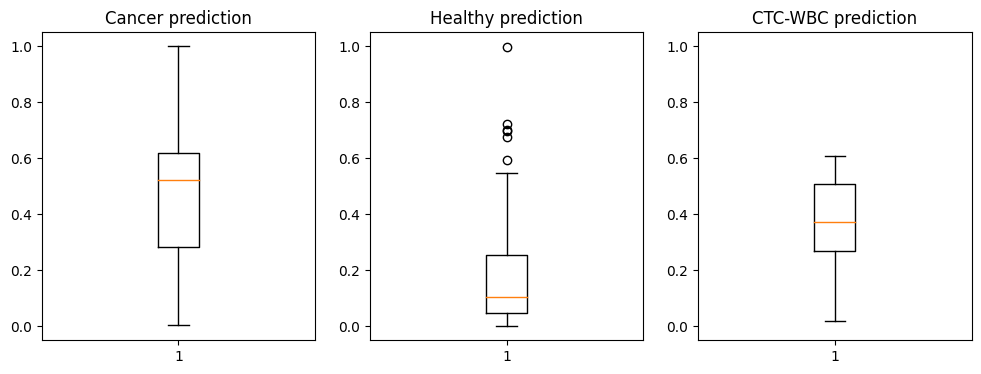

In [41]:
vis = Visualisation(brf_estimators, cut_by_mean_max_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

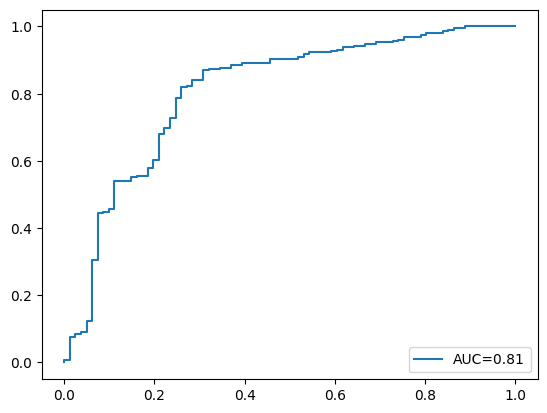

In [42]:
vis.draw_roc_curve_from_probabilities()

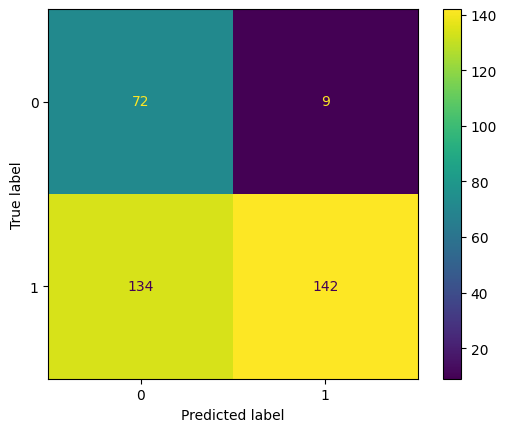

In [43]:
vis.display_confusion_matrix()

### Cut by mean with classes

In [44]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_with_classes_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9946045264822682
Training balanced accuracy 0.9974384487580518

Validation roc auc 0.9998427358620331
Training roc auc 0.9999983539972791

Validation precision 0.8712970627335892
Training precision 0.9156931074781317

Validation recall 0.9980430528375734
Training recall 1.0

Validation f1 0.9280856405134434
Training f1 0.9559538442458435



In [45]:
brf_model_object.display_test_results()

Test balanced accuracy 0.753913938092682

Test roc auc 0.8958892467346574

Test precision 0.887550510869064

Test recall 0.9070048309178743

Test f1 score 0.8960898796245589


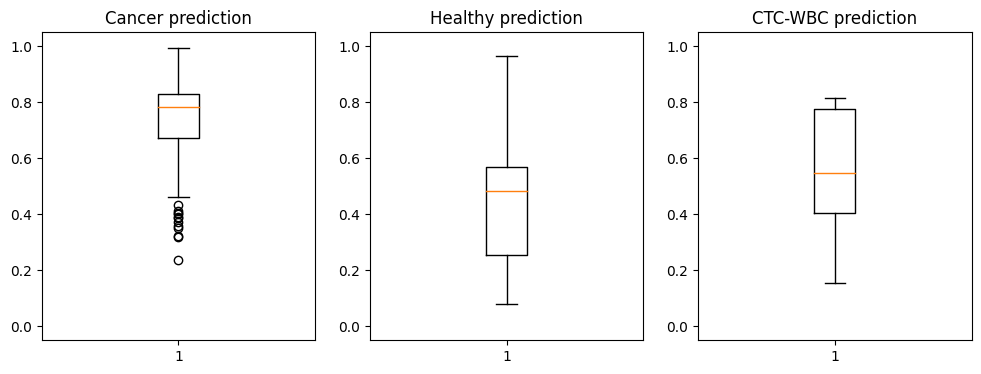

In [46]:
vis = Visualisation(brf_estimators, cut_by_mean_with_classes_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

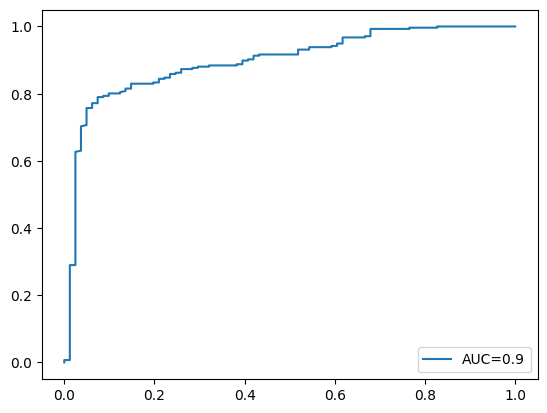

In [47]:
vis.draw_roc_curve_from_probabilities()

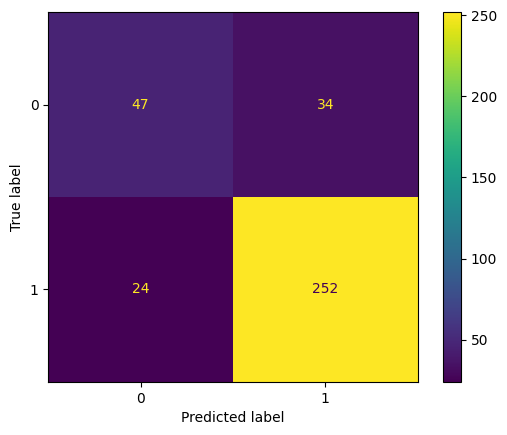

In [48]:
vis.display_confusion_matrix()